In [1]:
# import import_ipynb
# from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

# with the new api
from importnb import imports
with imports("ipynb"):
    from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_14D6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_48C6    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_48C6,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,
2023-11-05 00:00:30-05:00,4.0,7.0,7.0,NaN,NaN,12.0,4.0,5.0,8.0
2023-11-05 00:01:00-05:00,5.0,5.0,8.0,NaN,NaN,10.0,6.0,6.0,8.0
2023-11-05 00:01:30-05:00,5.0,4.0,8.0,NaN,NaN,9.0,9.0,5.0,9.0
2023-11-05 00:02:00-05:00,4.0,4.0,8.0,NaN,NaN,10.0,8.0,5.0,8.0
2023-11-05 00:02:30-05:00,4.0,4.0,8.0,NaN,NaN,10.0,8.0,5.0,8.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_48C6,TANGARA_F1AE,TANGARA_06BE
count,2786.000000,2499.000000,2588.000000,2768.000000,2560.000000,2563.000000,2558.000000,2611.000000,2765.000000
mean,5.702800,5.434974,6.195904,6.164379,4.969141,5.717519,4.475371,5.108388,6.998553
std,1.710871,1.924535,2.090684,2.239557,1.790575,2.149150,2.216653,1.527064,2.771573
min,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,3.000000,4.000000,5.000000
50%,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,7.000000
75%,7.000000,6.000000,7.000000,8.000000,6.000000,7.000000,6.000000,6.000000,9.000000
max,11.000000,11.000000,12.000000,12.000000,9.000000,12.000000,10.000000,9.000000,15.000000


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_48C6,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,
2023-11-05 00:00:30-05:00,17.0,30.0,30.0,NaN,NaN,50.0,17.0,21.0,34.0
2023-11-05 00:01:00-05:00,21.0,21.0,34.0,NaN,NaN,42.0,25.0,25.0,34.0
2023-11-05 00:01:30-05:00,21.0,17.0,34.0,NaN,NaN,38.0,38.0,21.0,38.0
2023-11-05 00:02:00-05:00,17.0,17.0,34.0,NaN,NaN,42.0,34.0,21.0,34.0
2023-11-05 00:02:30-05:00,17.0,17.0,34.0,NaN,NaN,42.0,34.0,21.0,34.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_48C6,TANGARA_F1AE,TANGARA_06BE
count,2786.000000,2499.000000,2588.000000,2768.000000,2560.000000,2563.000000,2558.000000,2611.000000,2765.000000
mean,24.097990,22.986395,26.185085,26.041185,21.040625,24.197035,19.069977,21.597089,29.492586
std,7.213498,8.059515,8.762210,9.365511,7.431168,8.965749,9.187834,6.390370,11.373050
min,9.000000,9.000000,9.000000,5.000000,0.000000,5.000000,0.000000,5.000000,5.000000
25%,17.000000,17.000000,21.000000,21.000000,17.000000,21.000000,13.000000,17.000000,21.000000
50%,21.000000,21.000000,25.000000,25.000000,21.000000,25.000000,17.000000,21.000000,30.000000
75%,30.000000,25.000000,30.000000,34.000000,25.000000,30.000000,25.000000,25.000000,38.000000
max,46.000000,46.000000,50.000000,50.000000,38.000000,50.000000,42.000000,38.000000,58.000000


## Histograms

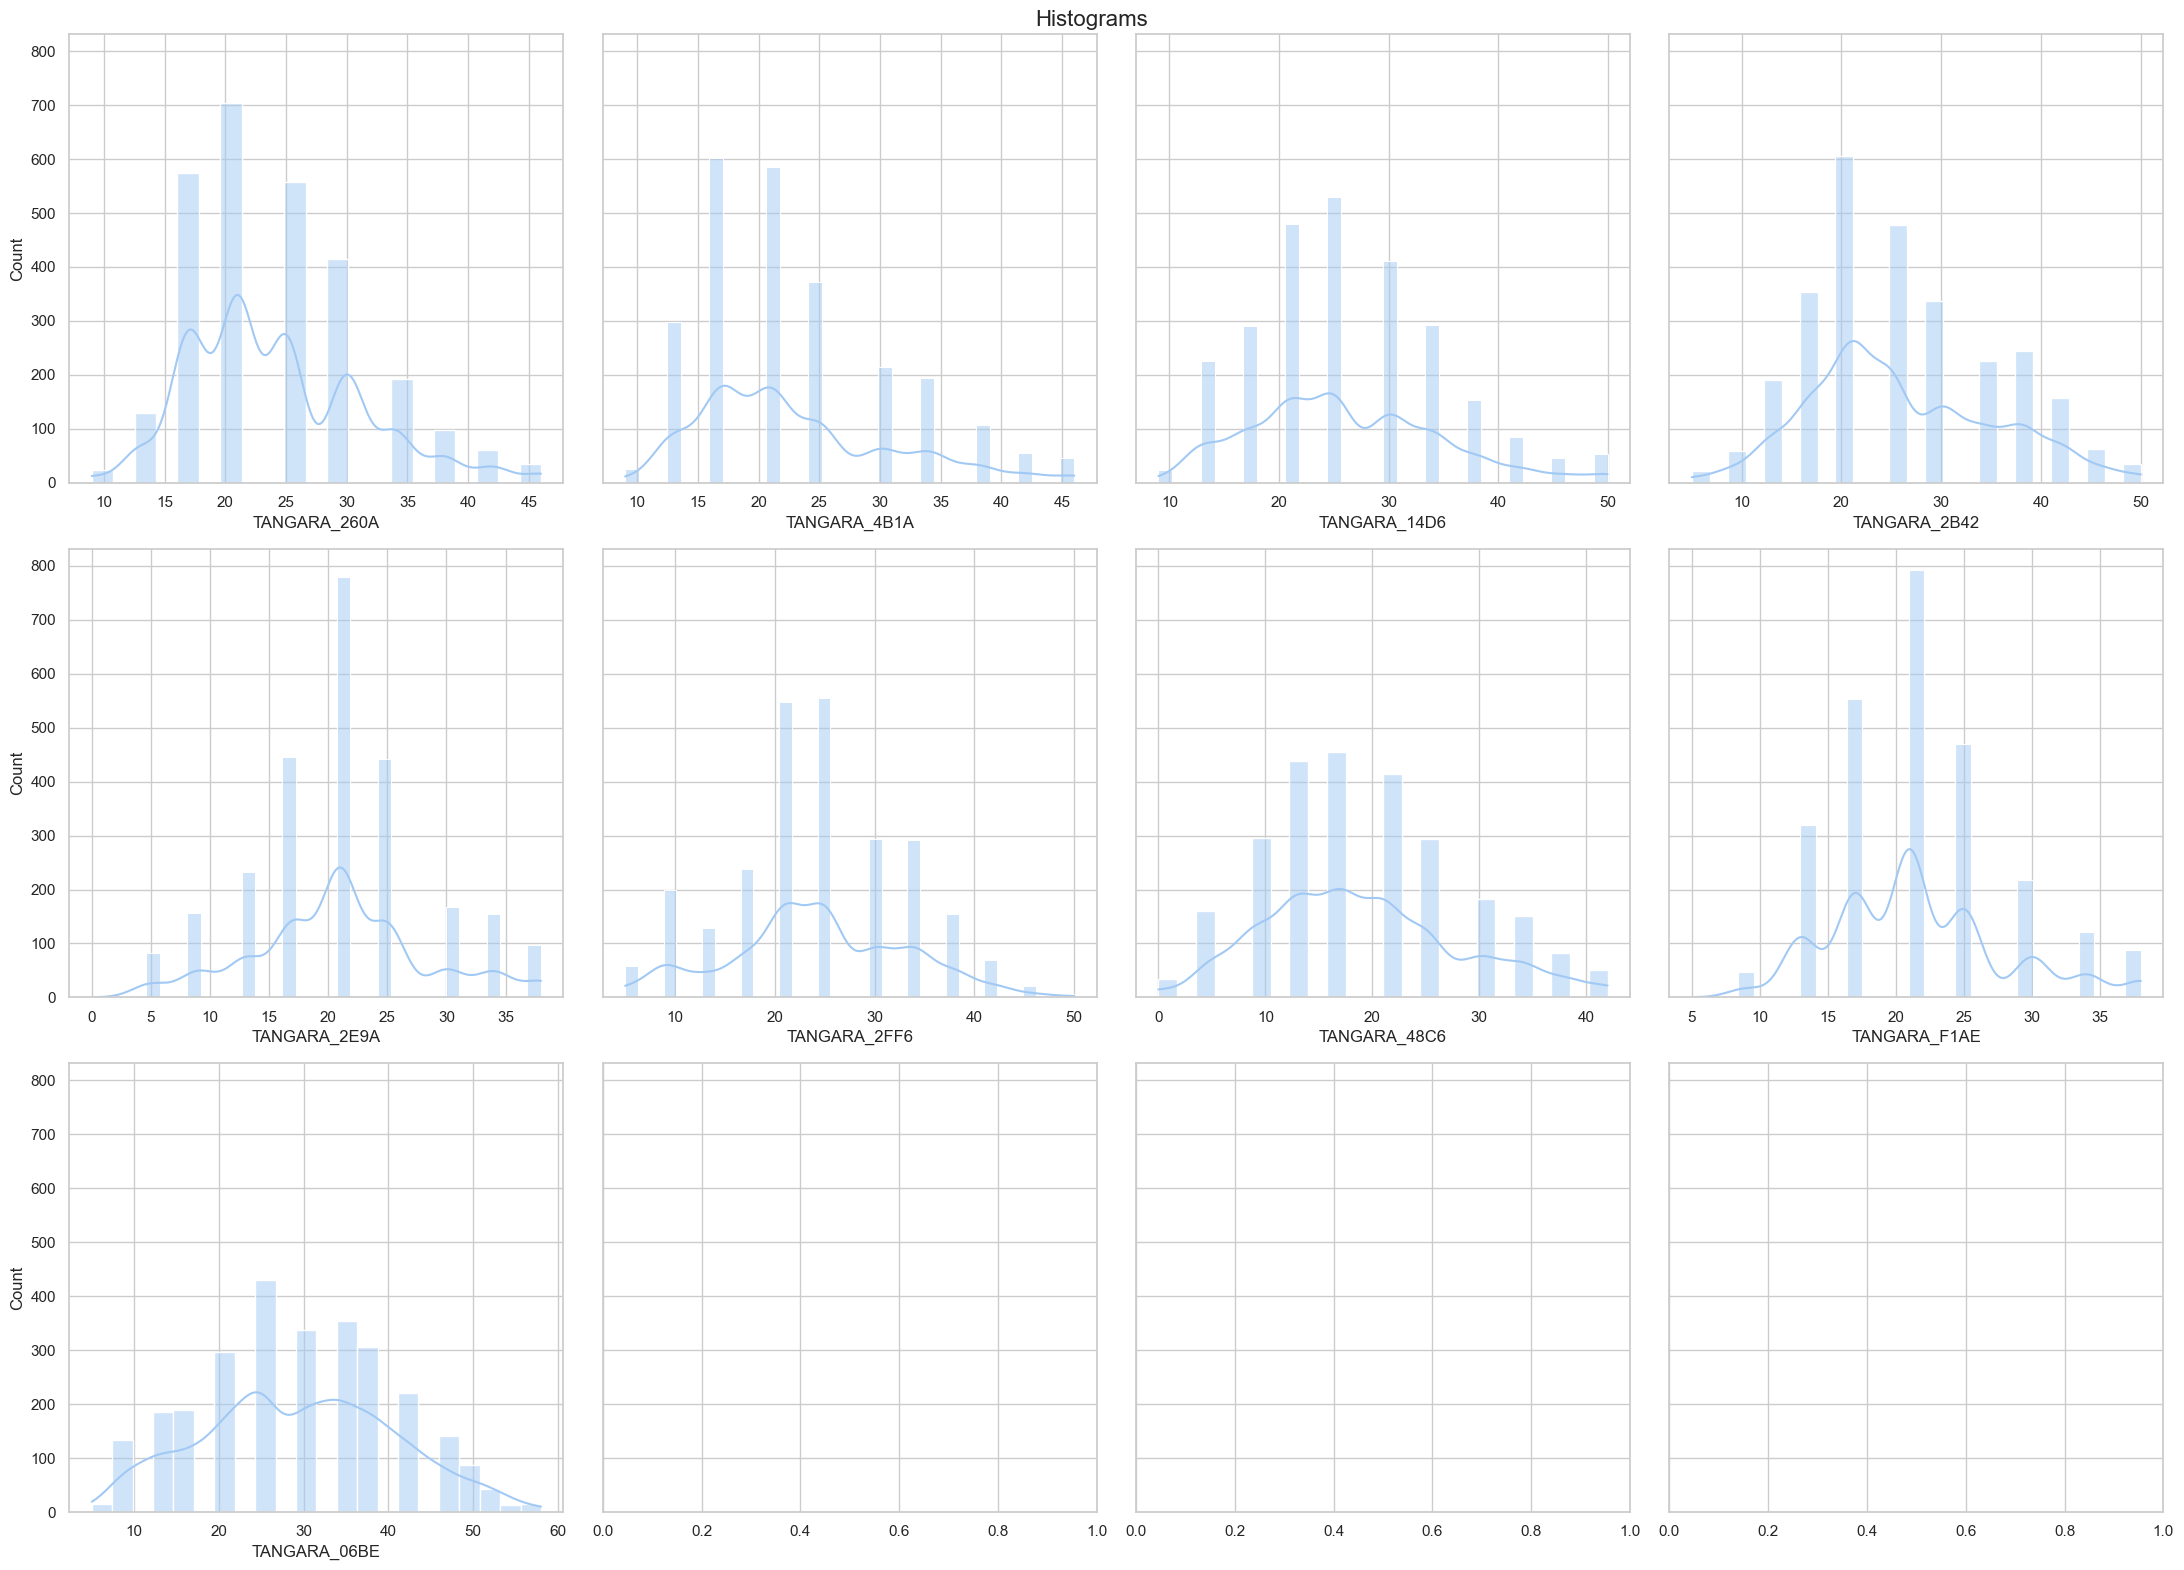

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

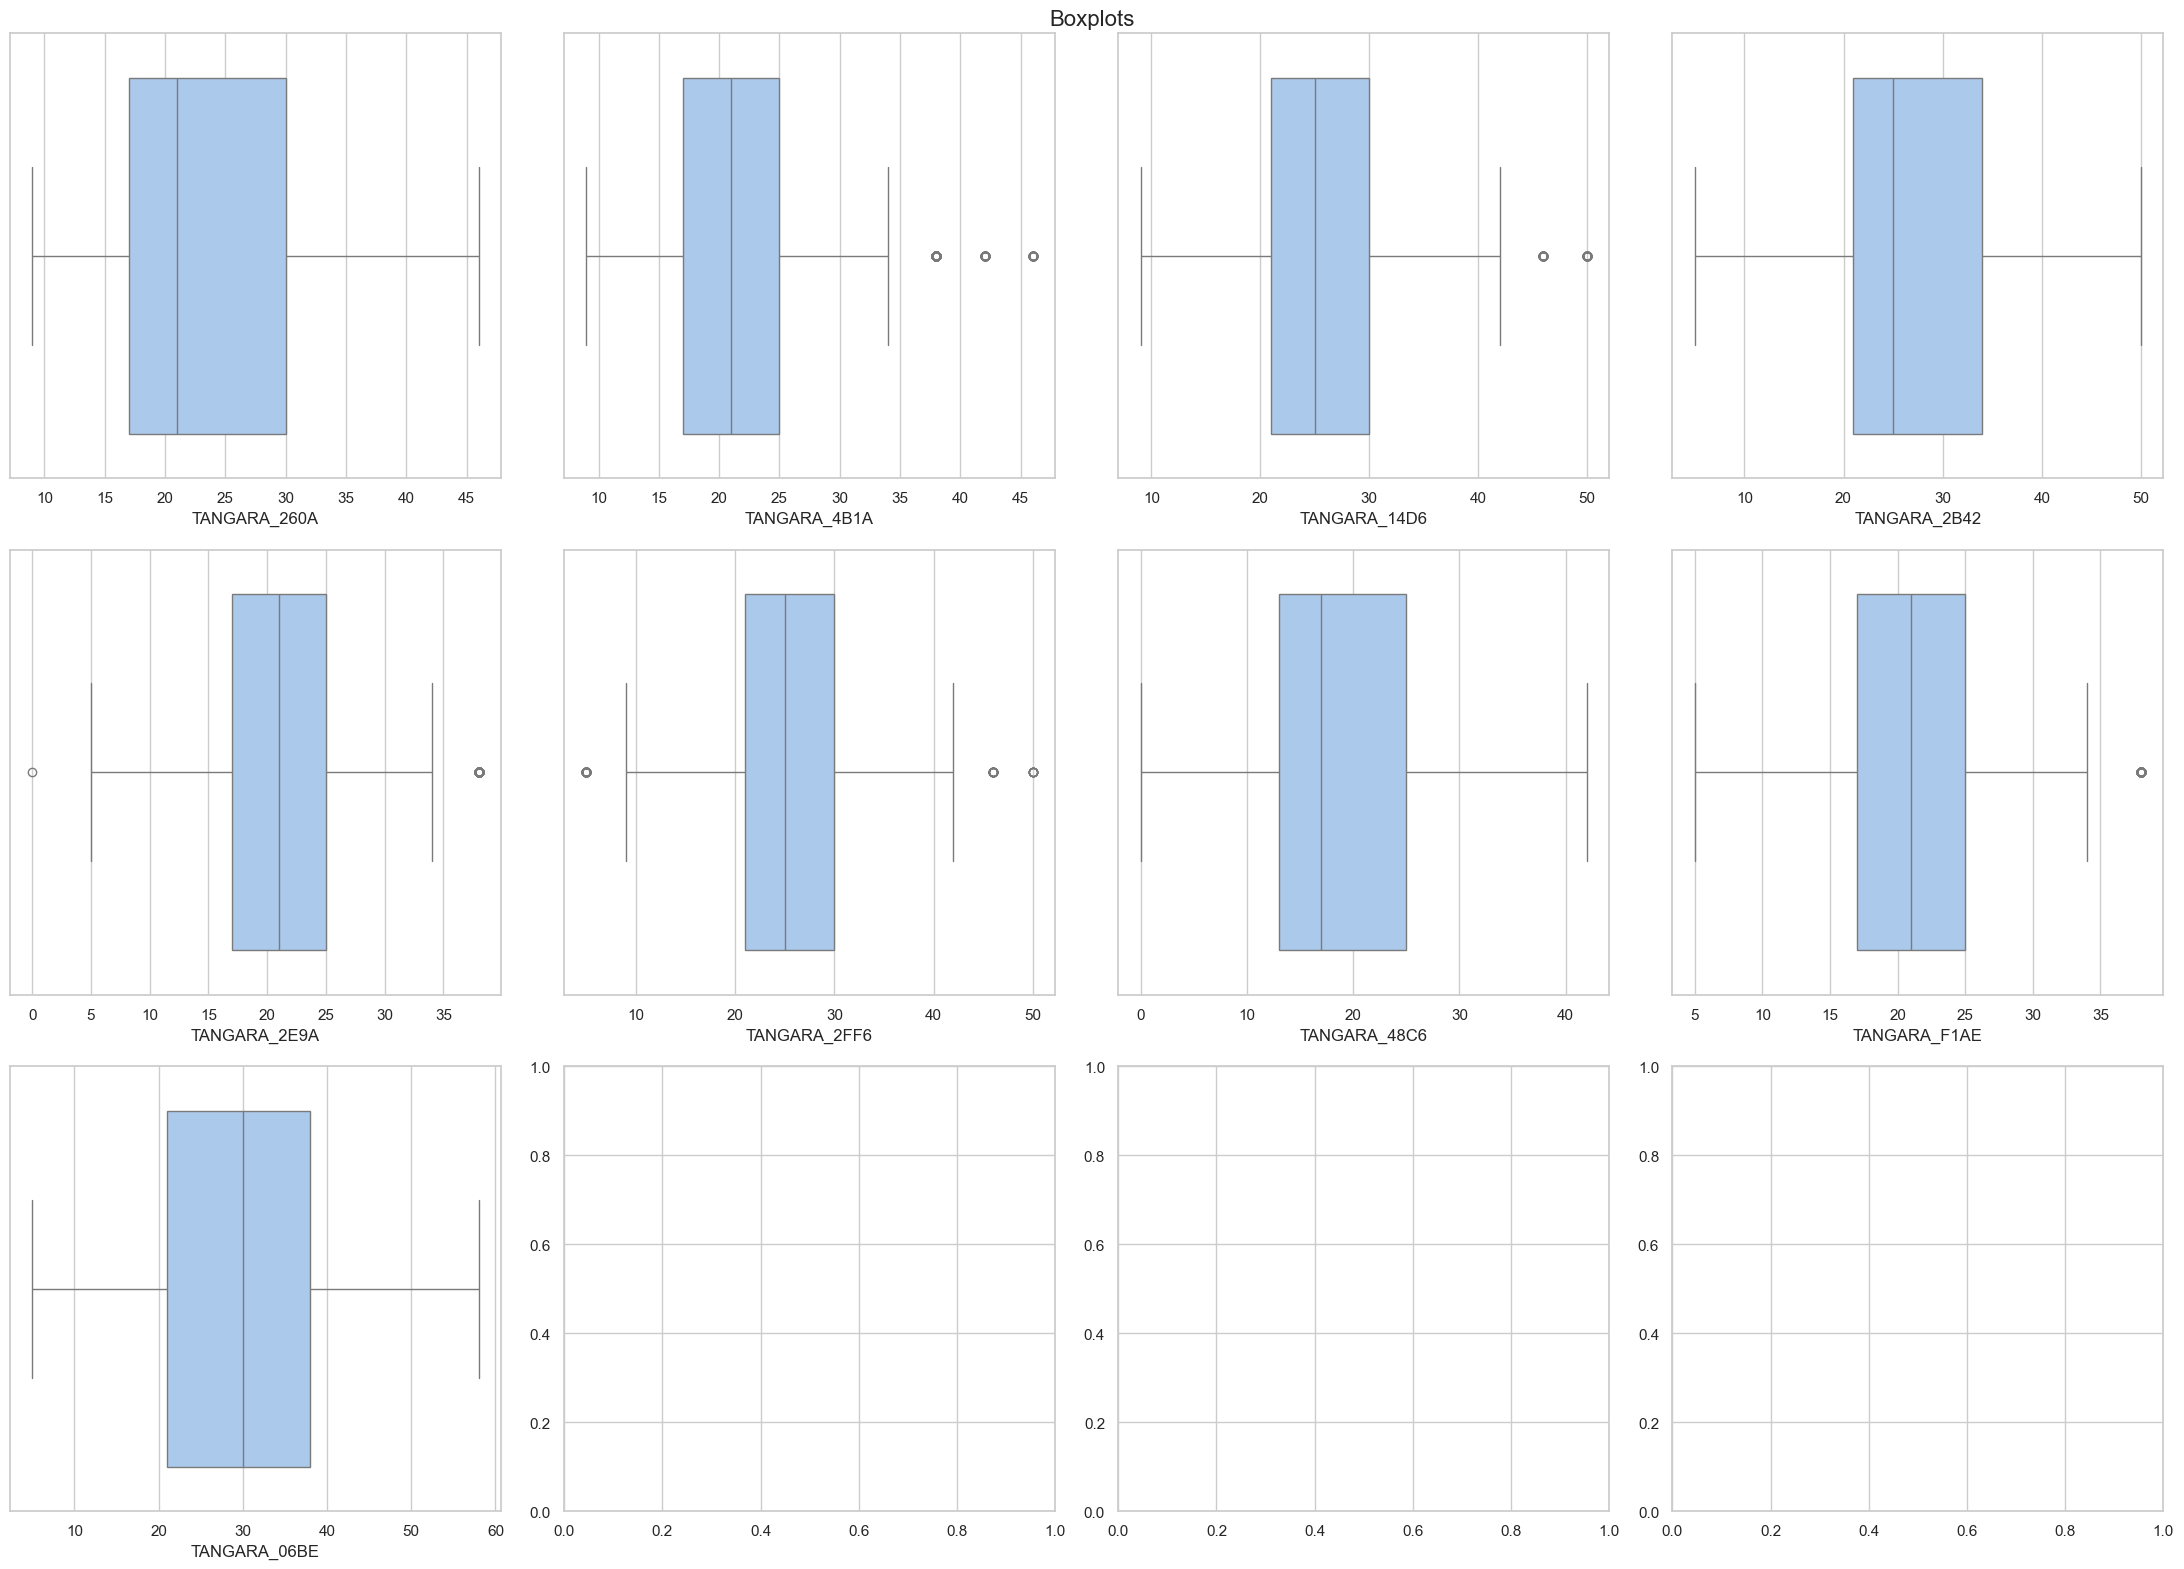

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

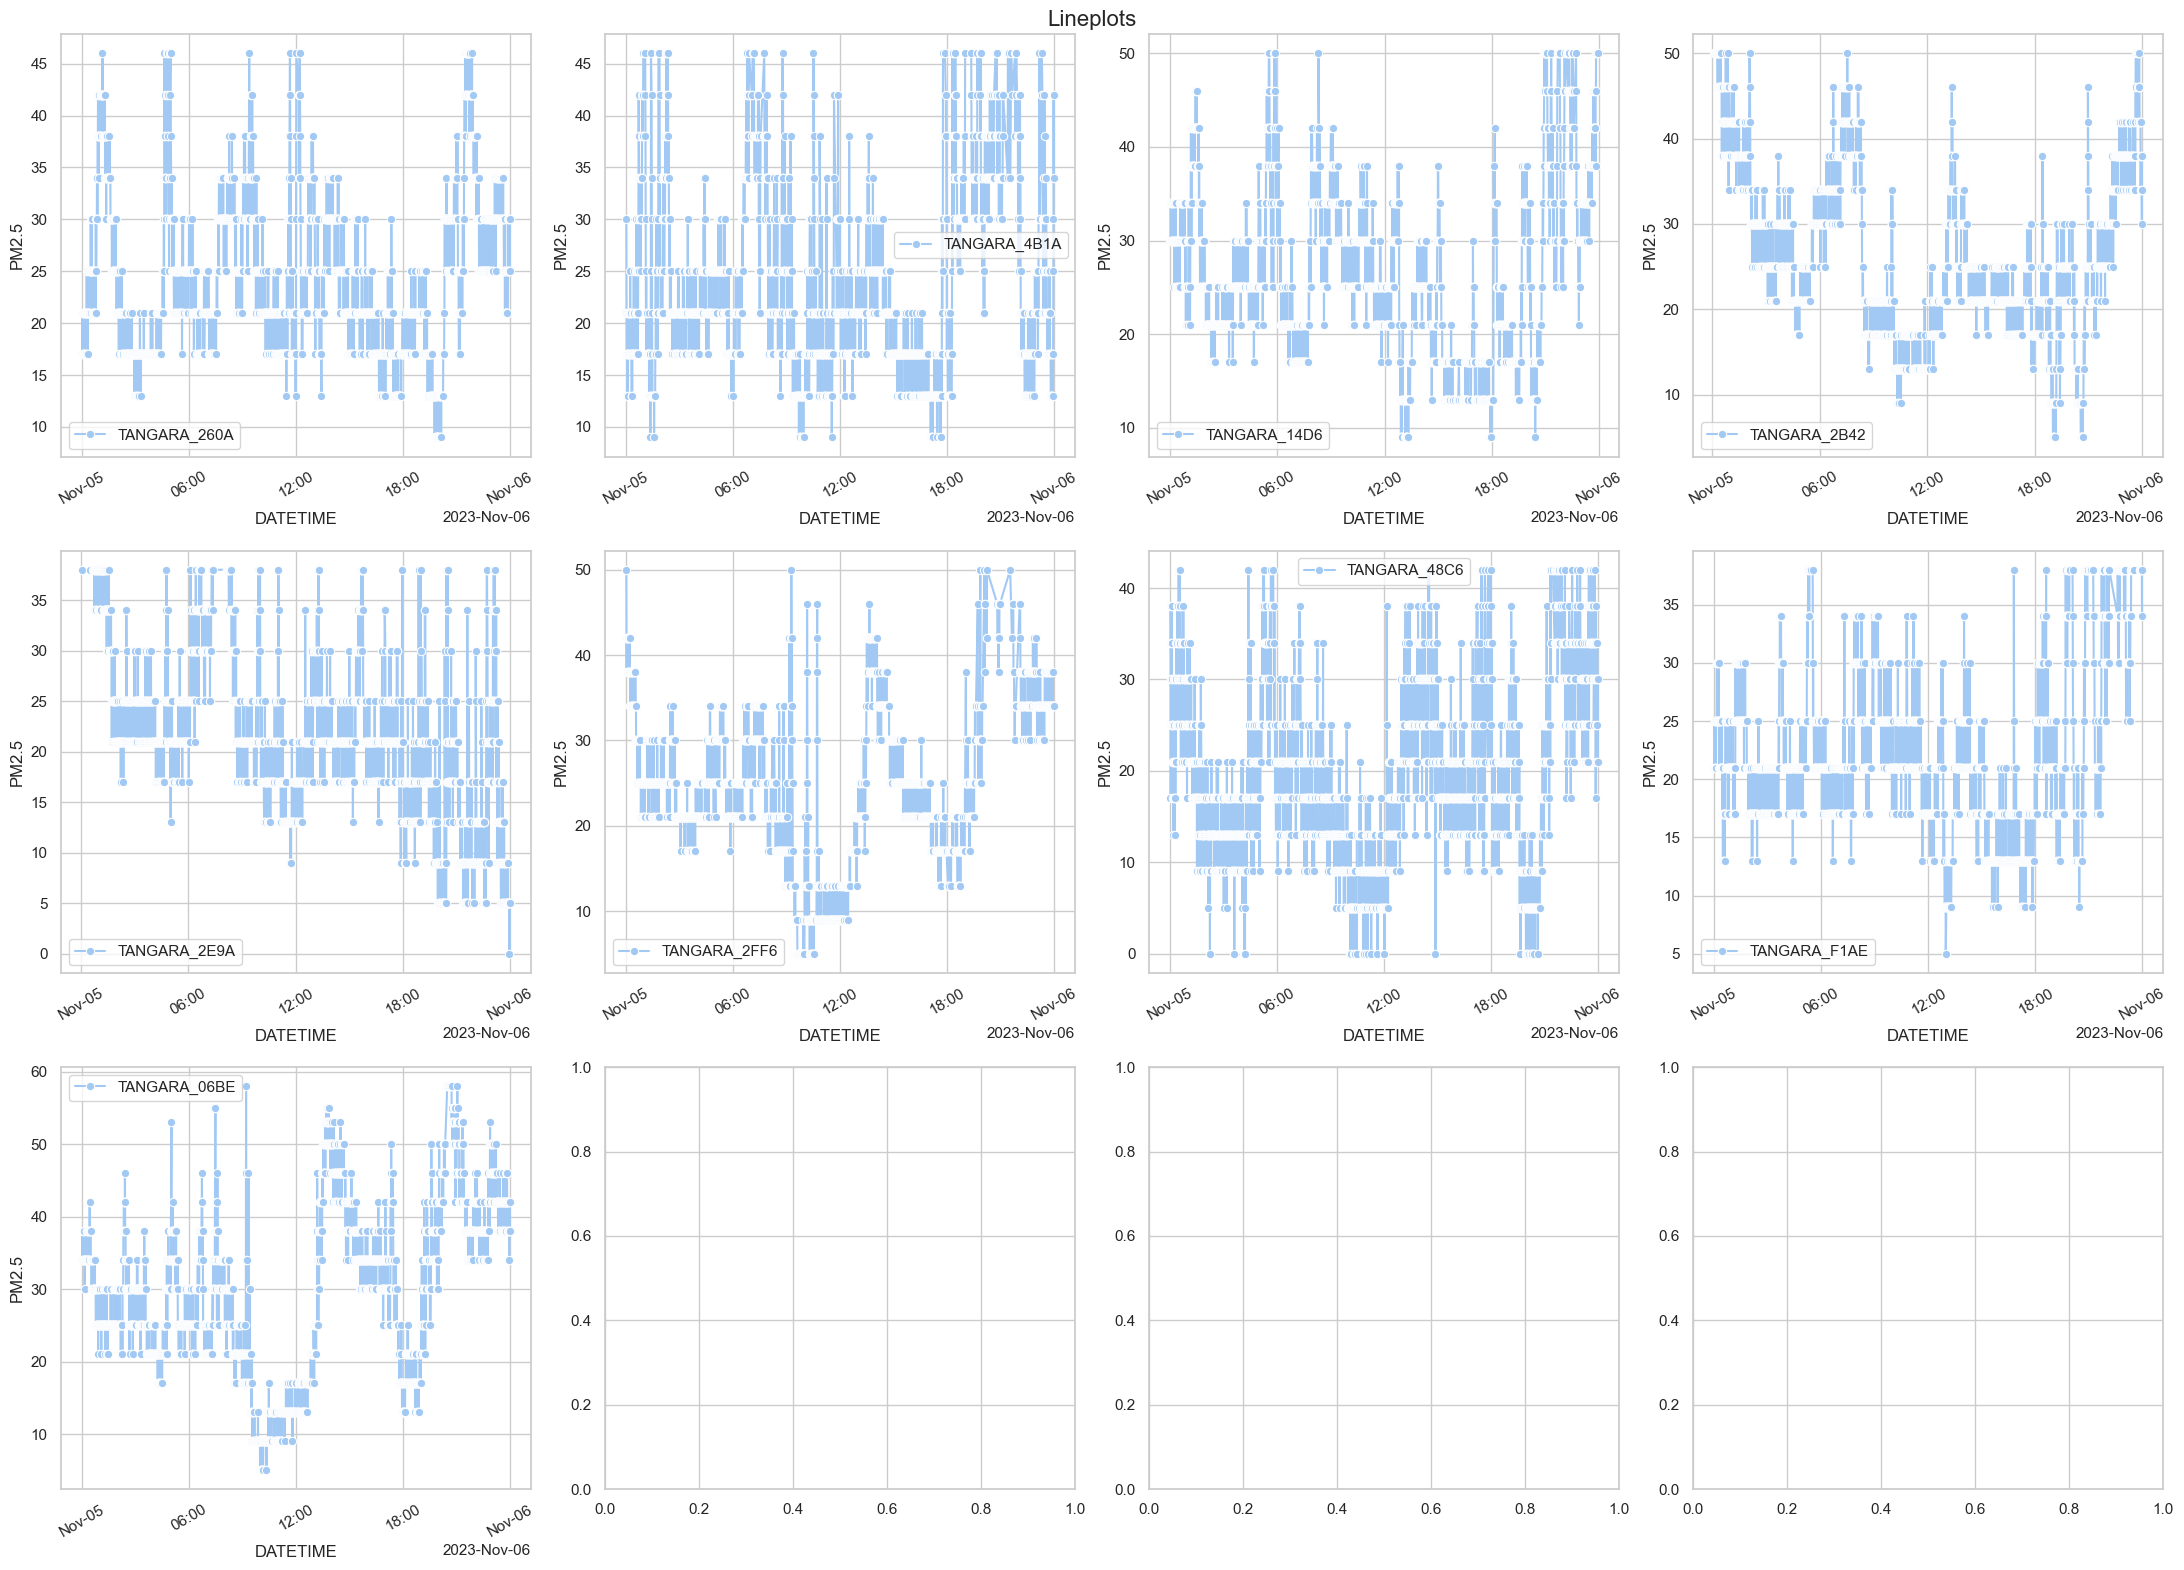

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')